<a href="https://colab.research.google.com/github/balsrini/Assignment6/blob/master/Assignment6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

#import of the Grad Cam

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

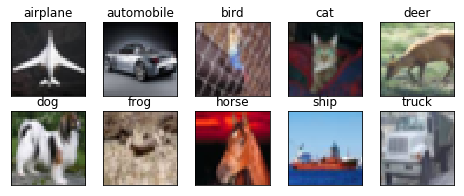

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [5]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [6]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [7]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(10, 2, 2,name="lastlayer", activation='softmax'))


model.add(Flatten())

#model.add(Dense(512))
#model.add(Dropout(0.5))
#model.add(Dense(256))
#model.add(Dropout(0.5))

#model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0706 16:18:43.849200 11452 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0706 16:18:43.862674 11452 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 16:18:43.865171 11452 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launch

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=5)`
  if sys.path[0] == '':
W0706 16:18:48.778514 11452 deprecation.py:323] From C:\Balaji\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a 

Epoch 1/5
390/390 [==============================] - 11s 29ms/step - loss: 1.5430 - acc: 0.4302 - val_loss: 1.3624 - val_acc: 0.5649
Epoch 2/5
390/390 [==============================] - 9s 22ms/step - loss: 1.0650 - acc: 0.6227 - val_loss: 1.0499 - val_acc: 0.6706
Epoch 3/5
390/390 [==============================] - 8s 21ms/step - loss: 0.8432 - acc: 0.7043 - val_loss: 0.8690 - val_acc: 0.7362
Epoch 4/5
390/390 [==============================] - 8s 21ms/step - loss: 0.7006 - acc: 0.7549 - val_loss: 0.7858 - val_acc: 0.7387
Epoch 5/5
390/390 [==============================] - 8s 21ms/step - loss: 0.6105 - acc: 0.7868 - val_loss: 0.7778 - val_acc: 0.7428
Model took 45.13 seconds to train


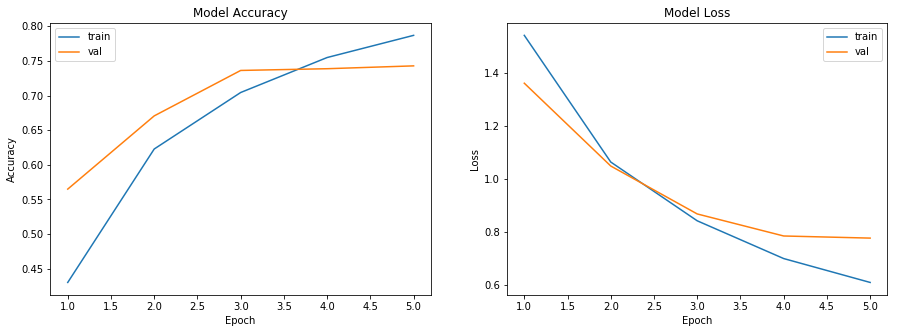

Accuracy on test data is: 74.28


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 5, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [11]:
import cv2
print(train_features.shape)
x=train_features[[13],::]
print(x.shape)
x= preprocess_input(x)
print(x.shape)


preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]   
print(class_output)

last_conv_layer = model.get_layer("conv2d_6")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)

pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads)

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(192):
 conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

print(conv_layer_output_value.shape)  


heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img = train_features[[13],::]


heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[2]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
img = np.squeeze(img, axis=0)
print(img.shape)
print(heatmap.shape)
#superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
#from google.colab.patches import cv2_imshow
cv2.imshow("Original", img)
#cv2_imshow(superimposed_img)

(50000, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
6
Tensor("strided_slice:0", shape=(?,), dtype=float32)
(?, 4, 4, 192)
Tensor("Mean:0", shape=(192,), dtype=float32)
(4, 4, 192)
(4, 4, 192)
(4, 4)
(32, 32, 3)
(32, 32, 3)


C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
import cv2
i =13
print(x.shape)
preds = model.predict(train_features[[13],::])
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]   

last_conv_layer = model.get_layer("lastlayer")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)

pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads)

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([train_features[13,::]])

for i in range(512):
 conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
#img = cv2.imread(img_path)
    
img = train_features[[13],::,0]
print(img.shape[1])
print(img.shape[0])
print(img.shape)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
#cv2.imshow("Original", img)
#cv2.imshow("GradCam", superimposed_img)
#plt.imshow(superimposed_img)
#plt.show()
